## Sales_prediction

Importing the packages 

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

In [2]:
sales_df = pd.read_csv("Data/Hoffman_Stores_Data.csv")
stores_df = pd.read_csv("Data/store.csv")

In [3]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [4]:
sales_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

In [5]:
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
sales_df.shape  ## checking shape of the sales dataset 

(1017209, 9)

As we could the see large number of rows. Reducing the row between 50000 to 100000 using RANDOM SAMPLING technique 

In [7]:
lower_limit = 50000
upper_limit = 100000

total_rows = len(sales_df)

# Define the number of rows you want to sample within the desired range
sample_size = random.randint(lower_limit, upper_limit)

random.seed(42)

random_indices = random.sample(range(total_rows), sample_size)
reduced_df = sales_df.iloc[random_indices]

print(reduced_df)

        Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
670487     43          4  07-11-2013   7434        647     1      1   
116739    780          6  18-04-2015   2487        332     1      0   
26225     581          3  08-07-2015   3946        517     1      0   
777572     88          6  03-08-2013   2433        267     1      0   
288389    703          4  06-11-2014   3495        373     1      1   
...       ...        ...         ...    ...        ...   ...    ...   
701133    584          5  11-10-2013   5059        467     1      1   
278383   1031          1  17-11-2014   4277        412     1      0   
205872    713          3  28-01-2015   9116       1103     1      1   
368219      5          2  12-08-2014   3831        529     1      0   
770568    889          6  10-08-2013   2217        275     1      0   

       StateHoliday  SchoolHoliday  
670487            0              0  
116739            0              0  
26225             0              0  

In [8]:
reduced_df.shape   ## reduced the rows from 1017209 to 61063

(94530, 9)

In [9]:
#info 
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94530 entries, 670487 to 770568
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          94530 non-null  int64 
 1   DayOfWeek      94530 non-null  int64 
 2   Date           94530 non-null  object
 3   Sales          94530 non-null  int64 
 4   Customers      94530 non-null  int64 
 5   Open           94530 non-null  int64 
 6   Promo          94530 non-null  int64 
 7   StateHoliday   94530 non-null  object
 8   SchoolHoliday  94530 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 7.2+ MB


In [10]:
#info 
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
#checking miss values
reduced_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

reduced_df has no missing values 

In [12]:
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

 There are missing values in CompetitionDistance,CompetitionOpenSinceMonth  ,CompetitionOpenSinceYear,Promo2SinceWeek ,Promo2SinceYear ,PromoInterval 

#### MISSING VALUES

Text(0.5, 0, 'Competition Distance Distribution Plot')

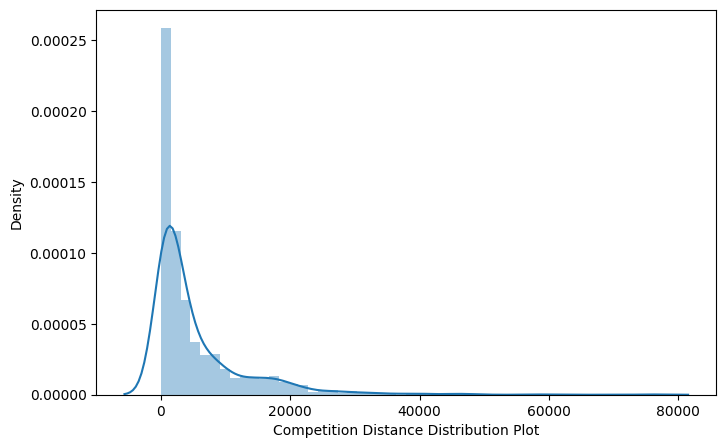

In [13]:
#CompetitionDistance -- checking the data distribution 
sns.distplot(x=stores_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

It shows that distribution is right skewed and Median can be used as it has outliers

In [14]:
#competition distance with the median value
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(), inplace = True)

In [15]:
# filling competition open since month and year with the most occuring values of the columns,, modes of those columns
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [16]:
# imputing the nan values of promo2 related columns with 0
stores_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_df['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_df['PromoInterval'].fillna(value=0,inplace=True)

In [17]:
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Merging the two Datasets

In [18]:
df = reduced_df.merge(right=stores_df, on="Store", how="left")

In [19]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,43,4,07-11-2013,7434,647,1,1,0,0,d,a,4880.0,9.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
1,780,6,18-04-2015,2487,332,1,0,0,0,a,a,18160.0,9.0,2013.0,0,0.0,0.0,0
2,581,3,08-07-2015,3946,517,1,0,0,0,a,a,7250.0,12.0,2013.0,0,0.0,0.0,0
3,88,6,03-08-2013,2433,267,1,0,0,0,a,a,10690.0,10.0,2005.0,0,0.0,0.0,0
4,703,4,06-11-2014,3495,373,1,1,0,0,a,a,80.0,6.0,2005.0,0,0.0,0.0,0


In [20]:
df.shape

(94530, 18)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94530 entries, 0 to 94529
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      94530 non-null  int64  
 1   DayOfWeek                  94530 non-null  int64  
 2   Date                       94530 non-null  object 
 3   Sales                      94530 non-null  int64  
 4   Customers                  94530 non-null  int64  
 5   Open                       94530 non-null  int64  
 6   Promo                      94530 non-null  int64  
 7   StateHoliday               94530 non-null  object 
 8   SchoolHoliday              94530 non-null  int64  
 9   StoreType                  94530 non-null  object 
 10  Assortment                 94530 non-null  object 
 11  CompetitionDistance        94530 non-null  float64
 12  CompetitionOpenSinceMonth  94530 non-null  float64
 13  CompetitionOpenSinceYear   94530 non-null  flo

Values in Categorical Features

In [22]:
#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [23]:
##checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {df[col].unique()}')

Unique values for DayOfWeek: [4 6 3 7 5 2 1]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 0 'c' 'b']
Unique values for SchoolHoliday: [0 1]
Unique values for StoreType: ['d' 'a' 'c' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 12. 10.  6.  7.  8. 11.  2.  4.  3.  5.  1.]
Unique values for CompetitionOpenSinceYear: [2013. 2005. 2014. 2003. 2002. 2009. 1990. 2012. 2006. 2011. 2010. 2015.
 2000. 2004. 2001. 2008. 2007. 1999. 1994. 1995. 1998. 1961. 1900.]
Unique values for Promo2: [1 0]
Unique values for Promo2SinceWeek: [37.  0. 31. 13.  5. 45. 40. 22. 35. 14. 18. 27.  1. 10. 36.  9. 23. 48.
 28. 49. 39. 44.  6. 50. 26.]
Unique values for Promo2SinceYear: [2009.    0. 2013. 2010. 2014. 2012. 2011. 2015.]
Unique values for PromoInterval: ['Jan,Apr,Jul,Oct' 0 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [24]:
#change into int type
df['StateHoliday'].replace({'0':0}, inplace=True)

In [25]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,43,4,07-11-2013,7434,647,1,1,0,0,d,a,4880.0,9.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
1,780,6,18-04-2015,2487,332,1,0,0,0,a,a,18160.0,9.0,2013.0,0,0.0,0.0,0
2,581,3,08-07-2015,3946,517,1,0,0,0,a,a,7250.0,12.0,2013.0,0,0.0,0.0,0
3,88,6,03-08-2013,2433,267,1,0,0,0,a,a,10690.0,10.0,2005.0,0,0.0,0.0,0
4,703,4,06-11-2014,3495,373,1,1,0,0,a,a,80.0,6.0,2005.0,0,0.0,0.0,0


In [26]:
df['Date'].dtype

dtype('O')

In [27]:
df['Date'] = pd.to_datetime(df['Date'])## converting the datatype of date 

In [28]:
#creating features from the date

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()

In [29]:
df['Year']

0        2013
1        2015
2        2015
3        2013
4        2014
         ... 
94525    2013
94526    2014
94527    2015
94528    2014
94529    2013
Name: Year, Length: 94530, dtype: int64

In [30]:
df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,43,4,2013-07-11,7434,647,1,1,0,0,d,...,9.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",2013,7,28,192
1,780,6,2015-04-18,2487,332,1,0,0,0,a,...,9.0,2013.0,0,0.0,0.0,0,2015,4,16,108
2,581,3,2015-08-07,3946,517,1,0,0,0,a,...,12.0,2013.0,0,0.0,0.0,0,2015,8,32,219
3,88,6,2013-03-08,2433,267,1,0,0,0,a,...,10.0,2005.0,0,0.0,0.0,0,2013,3,10,67
4,703,4,2014-06-11,3495,373,1,1,0,0,a,...,6.0,2005.0,0,0.0,0.0,0,2014,6,24,162
5,928,3,2014-10-12,6097,546,1,0,0,0,d,...,9.0,2013.0,1,31.0,2013.0,"Feb,May,Aug,Nov",2014,10,41,285
6,1019,6,2015-03-01,7462,686,1,0,0,0,d,...,7.0,2014.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,3,9,60
7,252,7,2015-03-22,0,0,0,0,0,0,d,...,9.0,2013.0,1,5.0,2010.0,"Feb,May,Aug,Nov",2015,3,12,81
8,337,4,2013-08-08,3618,314,1,0,0,1,d,...,7.0,2005.0,1,45.0,2014.0,"Feb,May,Aug,Nov",2013,8,32,220
9,434,7,2015-04-26,0,0,0,0,0,0,a,...,8.0,2003.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2015,4,17,116


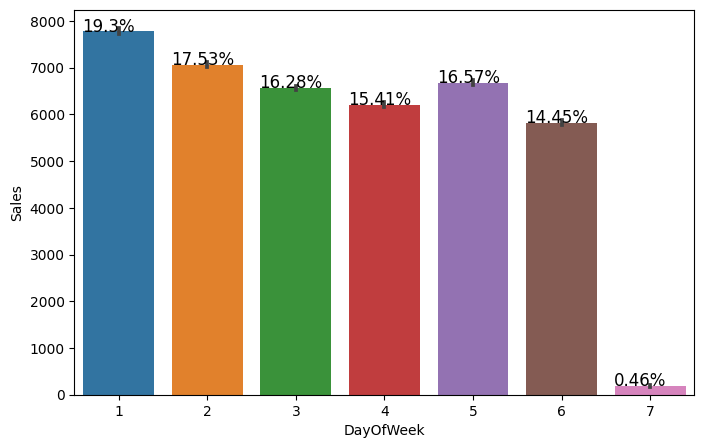

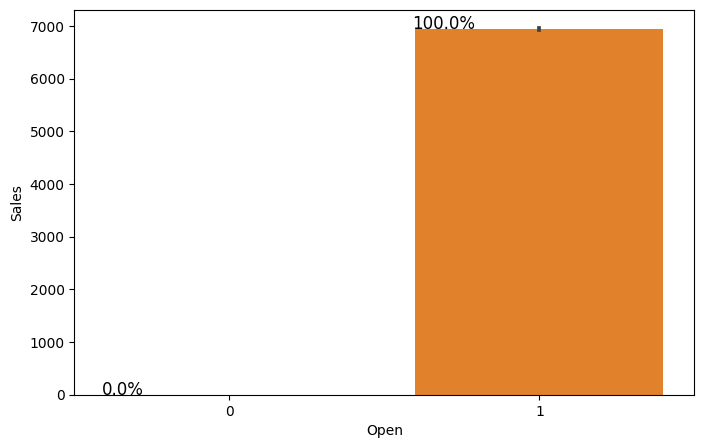

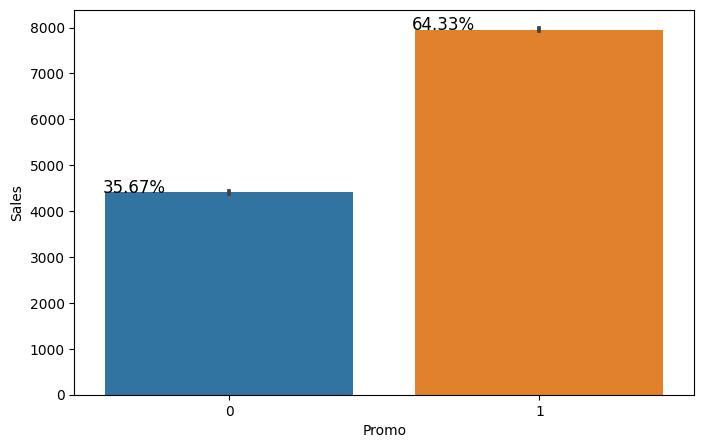

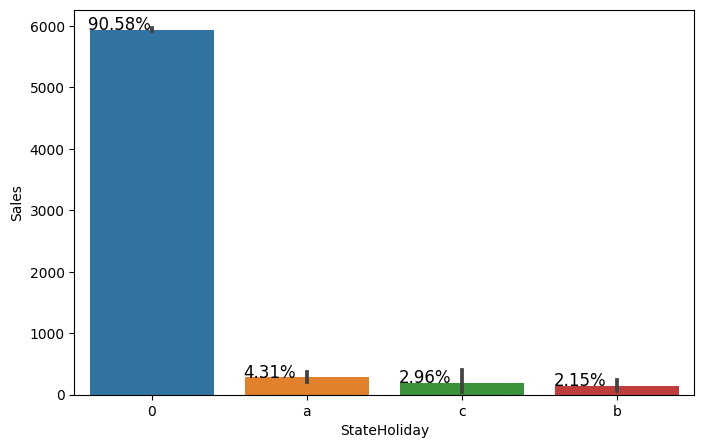

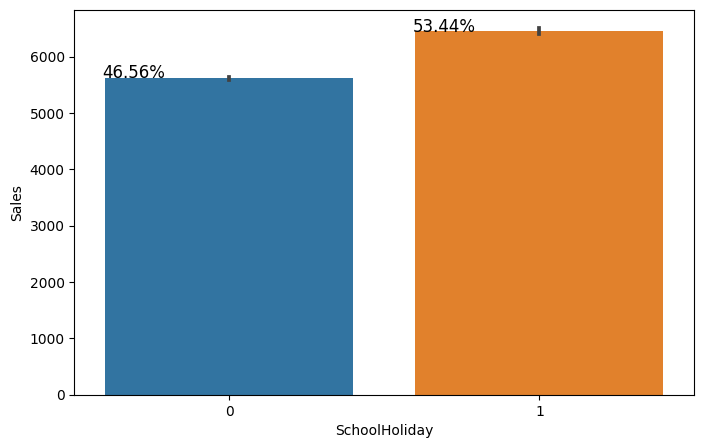

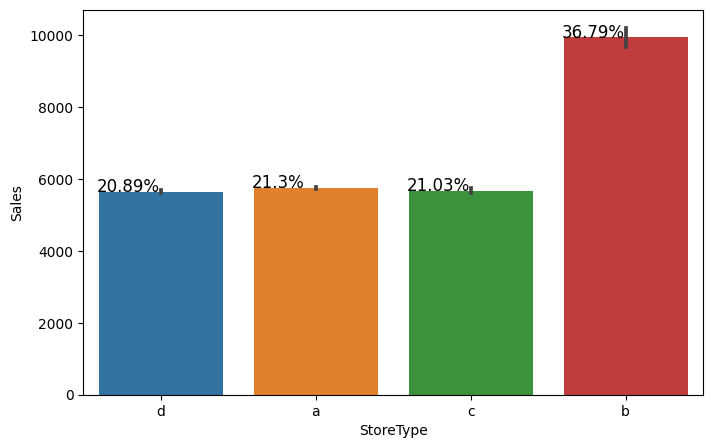

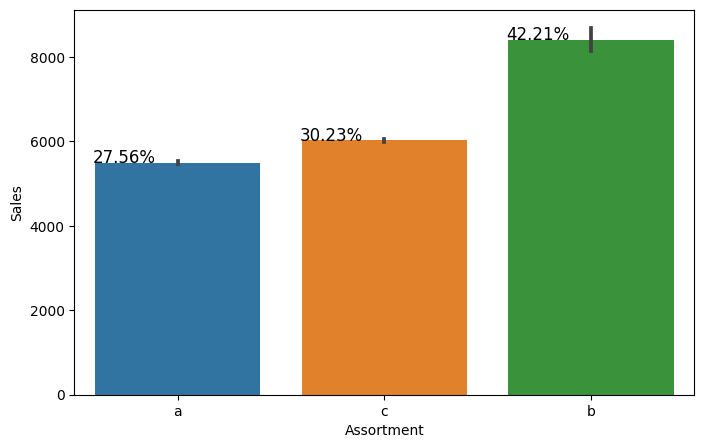

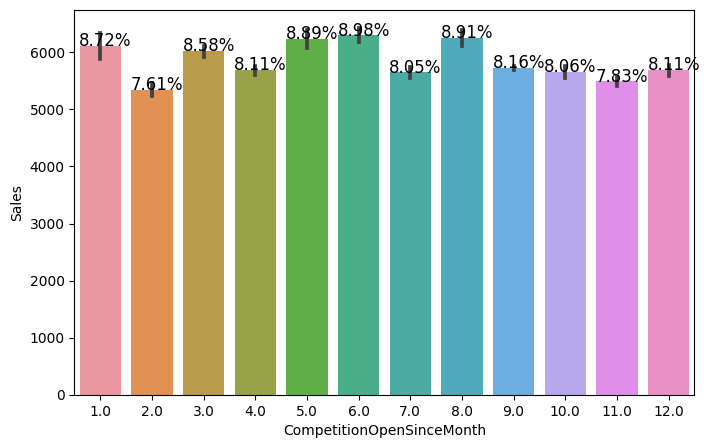

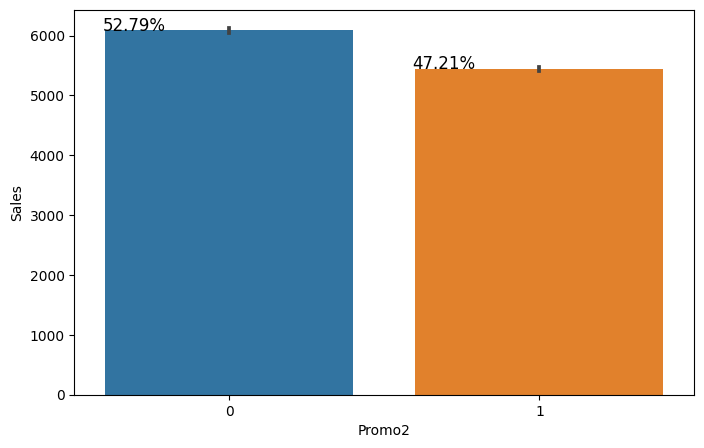

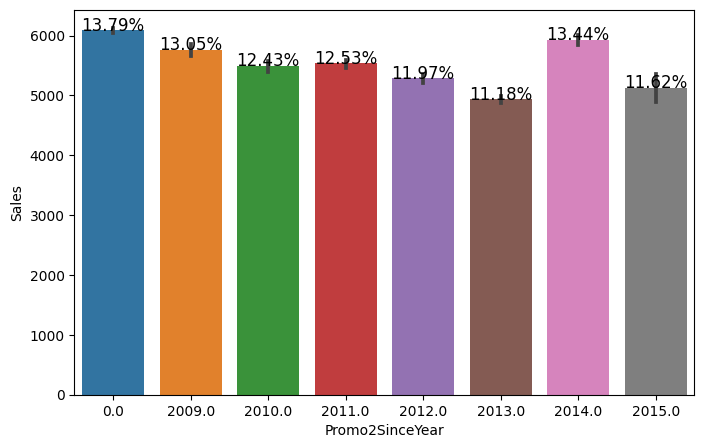

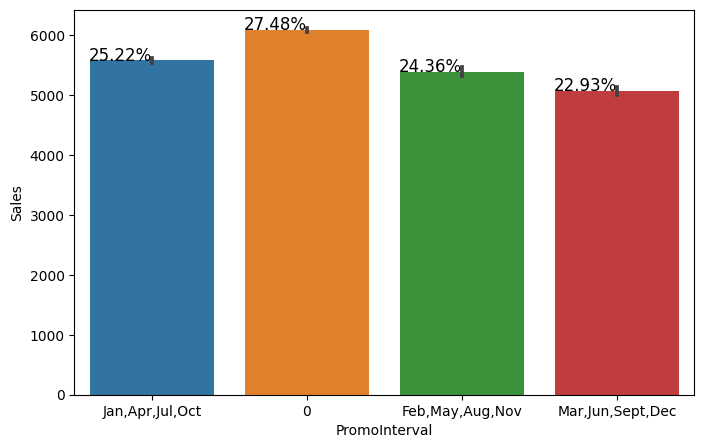

In [31]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

Observation:

There were more sales on Monday
It could be seen that the Promo leads to more sales.
Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
On an average Store type B had the highest sales.
Highest average sales were seen with Assortment levels-b which is 'extra'.
With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

<AxesSubplot: xlabel='Open', ylabel='Sales'>

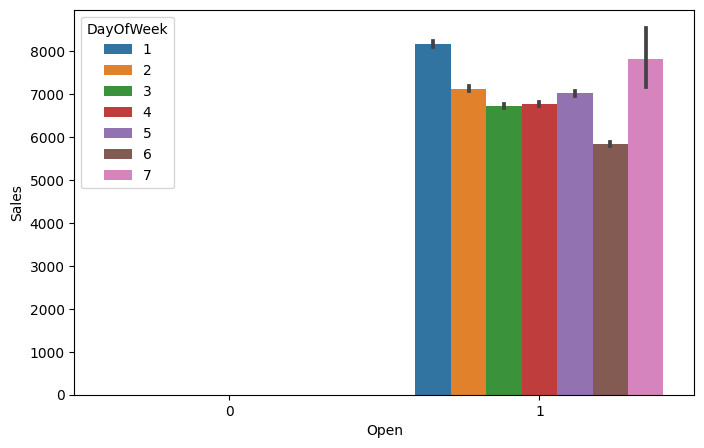

In [32]:
# open and storetype relationship 
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

<AxesSubplot: xlabel='Open', ylabel='count'>

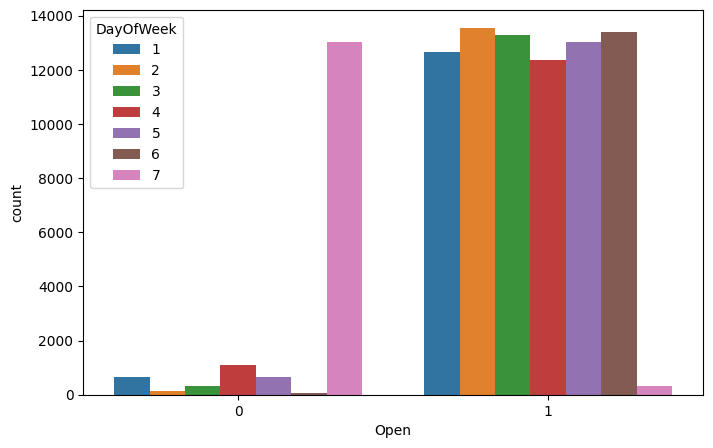

In [33]:
#Lets see open, how many shops are open on which days 
#and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
sns.countplot(x=df["Open"], hue=df["DayOfWeek"])

Observation: This is a count plot of open shops according to the day of the week. It's clear that the number of shops open on Sundays were very less and hence low sales. Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays.

<AxesSubplot: xlabel='StoreType', ylabel='Sales'>

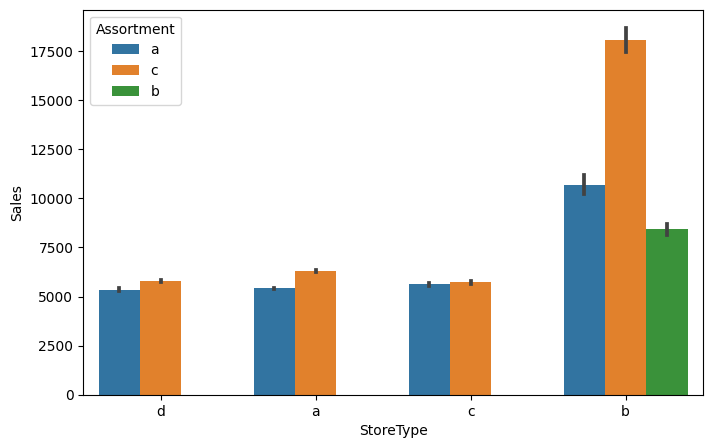

In [34]:
# relationship between store type, assortment levels and sales
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

Observation: The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

In [35]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,294388625,33806080
3,d,164369377,14595152
2,c,72076294,8491603
1,b,14186033,2808623


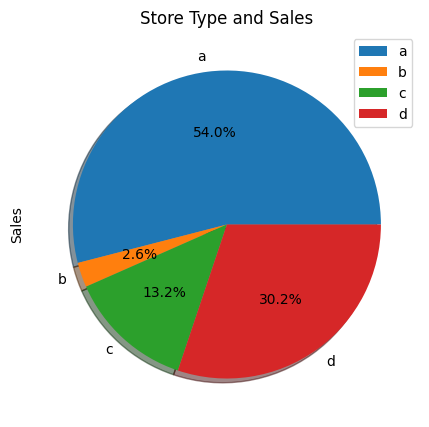

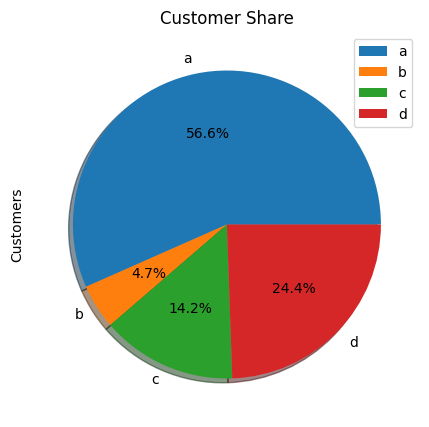

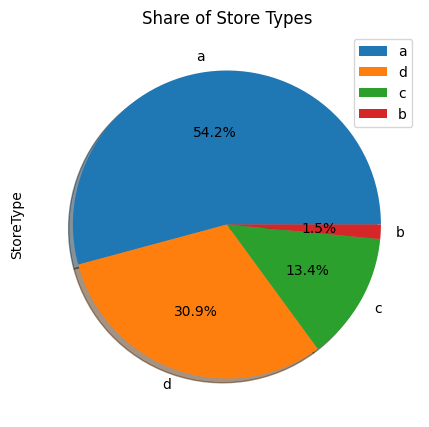

In [36]:
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

Observation:

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.
But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

In [37]:
##Sales with Time

years

array([2013, 2015, 2014], dtype=int64)

In [38]:
#sales over the years
sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]

In [39]:
#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

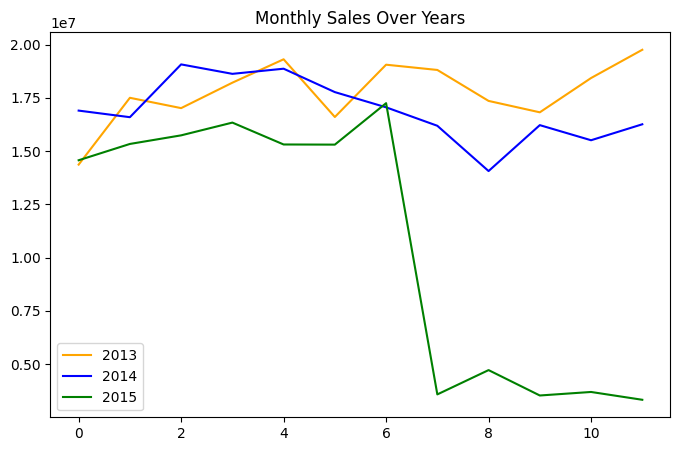

In [40]:
#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

Observation: Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

<AxesSubplot: xlabel='Customers', ylabel='Sales'>

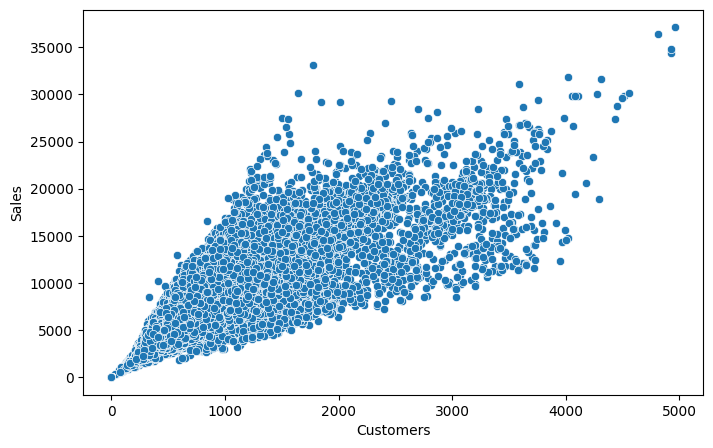

In [41]:
#scatterplot of Customers and Sales
sns.scatterplot(x=df['Customers'], y=df['Sales'])

Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

<AxesSubplot: xlabel='CompetitionDistance', ylabel='Sales'>

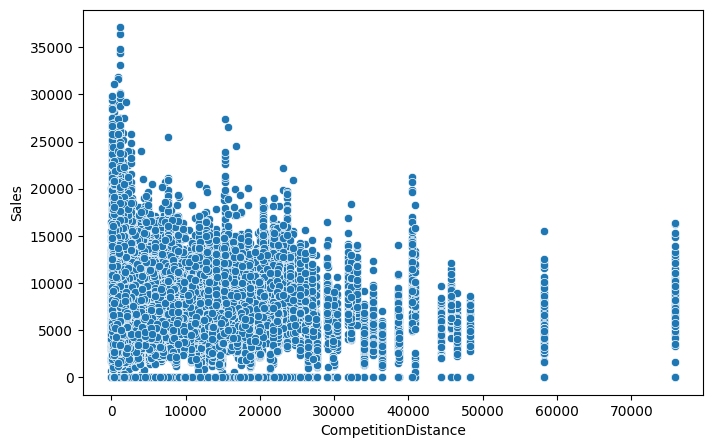

In [42]:
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

Observation: From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

<AxesSubplot: ylabel='Density'>

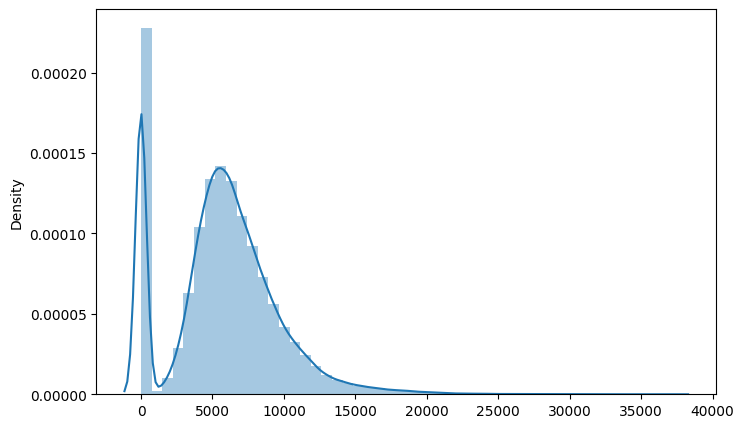

In [43]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df['Sales'])

Observation: The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

Correlation Matrix Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.

By checking the correlation the factors affecting sales can be figured out.

In [44]:
#meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

<AxesSubplot: >

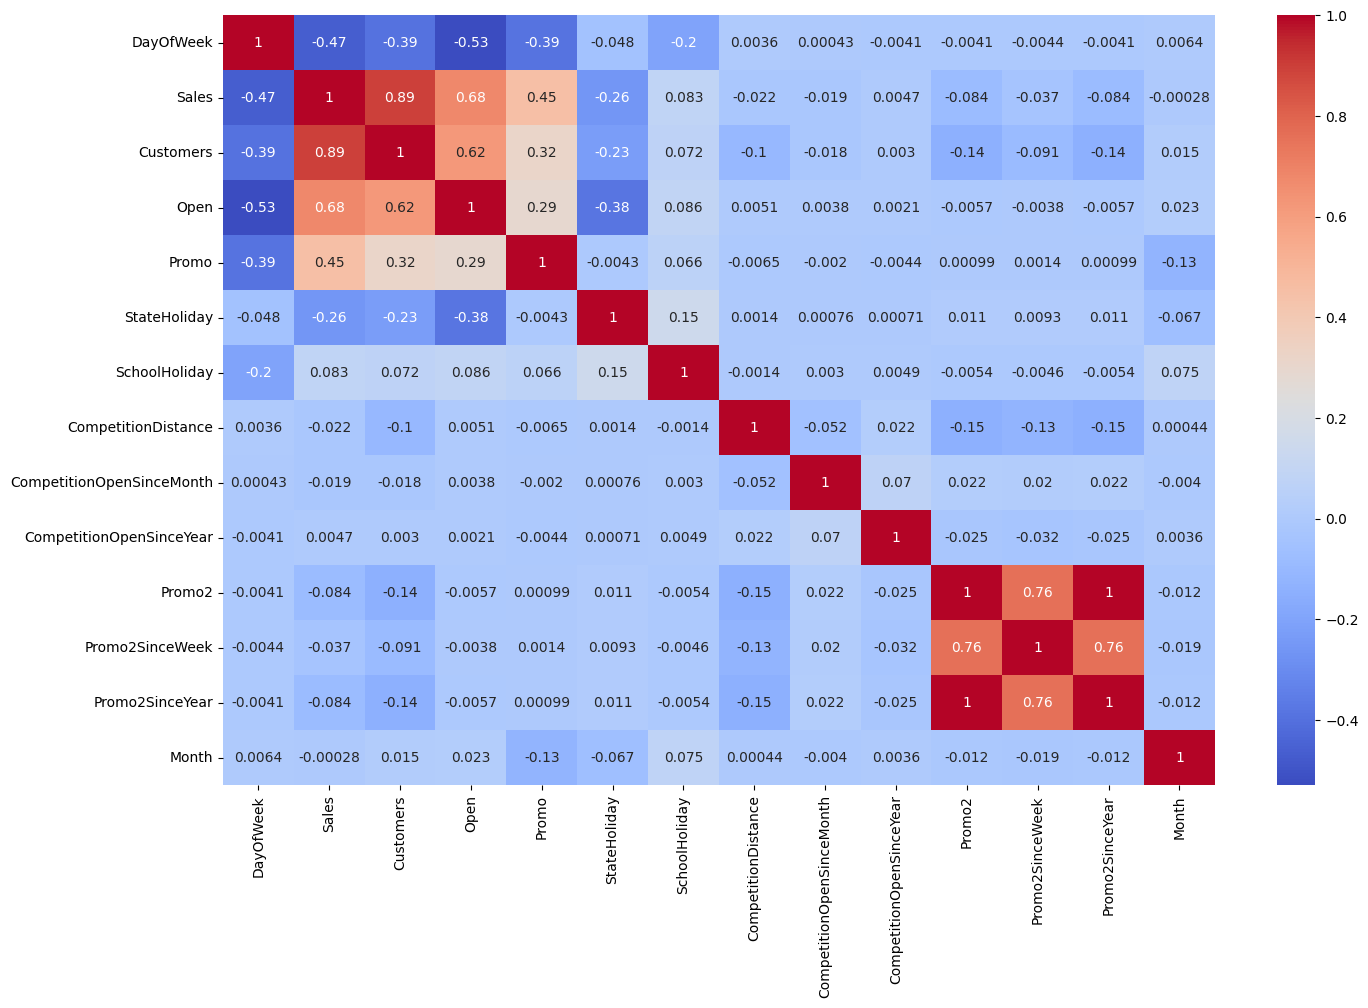

In [45]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

Observation:

Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

In [46]:
df_clean = df.to_csv("Data/clean2.csv")

Feature Engineering

In [47]:
(df[df.Open == 0]).shape

(15979, 22)

In [48]:
df1 = df[df.Open != 0]
df1.drop('Open', axis=1, inplace=True)

It is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales. This was also indicated in the barplot of Open vs Sales.

In [49]:
df1.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,43,4,2013-07-11,7434,647,1,0,0,d,a,...,9.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",2013,7,28,192


<AxesSubplot: ylabel='Density'>

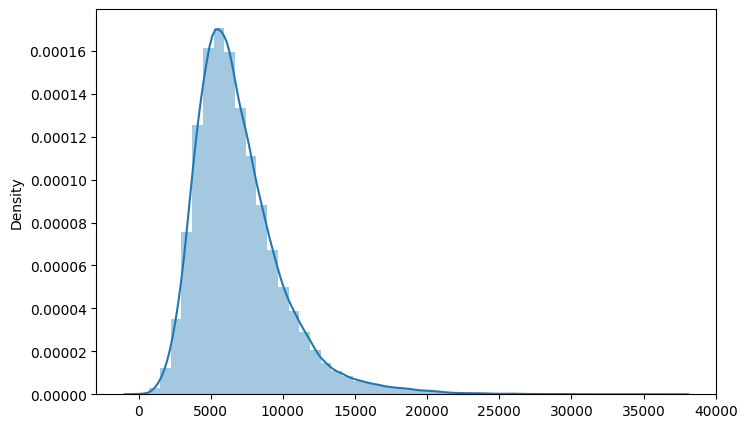

In [50]:
sns.distplot(x=df1['Sales'])

In [51]:
df1['Sales'] = np.log(df1['Sales'])

In [52]:
df1.dropna(inplace=True)

In [53]:
df1.drop(df1[df1['Sales'] == float("-inf")].index,inplace=True)

<AxesSubplot: ylabel='Density'>

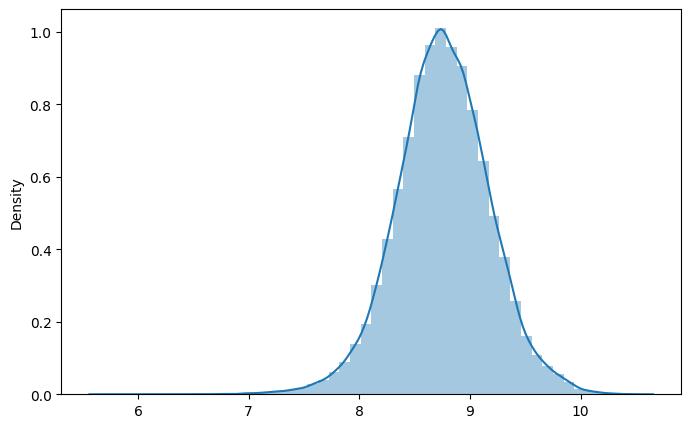

In [54]:
#distribution plot of Sales
sns.distplot(x=df1['Sales'])

In [55]:
df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [56]:
#combining competition open since month and year into total months
df1['CompetitionOpen'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + (df1['Month'] - df1['CompetitionOpenSinceMonth'])
#correcting the neg values
df1['CompetitionOpen'] = df1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [57]:
#changing promo2 features into meaningful inputs
#combining promo2 to total months
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + (df1['WeekOfYear'] - df1['Promo2SinceWeek'])*0.230137

#correcting the neg values
df1['Promo2Open'] = df1['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df1['Promo2']

#creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',')
    if df['Month'] and month_dict[df['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

#Applying 
df1['Promo2running'] = df1.apply(promo2running,axis=1)*df1['Promo2']

#Dropping unecessary columns
df1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [58]:
#setting date and store as index
df1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df1.sort_index(inplace=True)

Outlier Detection

Outliers and Z score: In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

z = (x-mean)/standard deviation

Total number of Outliers present in the Sales column are 141.


[Text(0.5, 1.0, 'Outliers Distribution')]

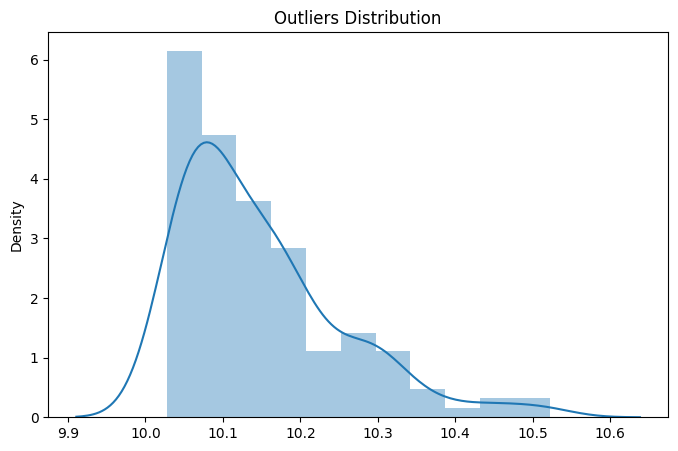

In [59]:
#code to seperate outliers
mean_sales = np.mean(df1['Sales']) #mean
sd_sales = np.std(df1['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df1['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers        
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')

In [60]:
#percentage of sales greater than 10.2
sales_outliers = df1.loc[df1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(df1))*100
#print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 0.04201466693827663


In [61]:
#exploring the reasons behind this behaviour
sales_outliers

DayOfWeek      Sales  Customers  Promo  StateHoliday  \
Date       Store                                                         
2013-02-05 817            4  10.304777       4084      1             0   
2013-03-10 262            4  10.444910       4925      0             1   
2013-04-03 513            1  10.243810       2868      1             0   
2013-04-24 817            3  10.222305       3984      1             0   
2013-07-14 262            7  10.312679       4560      0             0   
2013-08-09 262            7  10.304710       4515      0             0   
2013-12-16 57             1  10.279798       2009      1             0   
           211            1  10.200402       2407      1             0   
2013-12-18 1114           3  10.303370       4105      1             0   
2014-01-05 262            4  10.457775       4931      1             1   
2014-02-09 357            2  10.280862       1846      1             0   
2014-03-03 817            1  10.217312       3478      1             0   
2014-03-31 1014           1  10.285820       2458      1             0   
2014-05-12 1114           5  10.303404       4054      1             0   
2014-05-30 1114           5  10.216910       4437      0             0   
2014-06-20 842            5  10.407077       1774      1             0   
2014-06-30 817            1  10.288001       3752      1             0   
           1027           1  10.256079       2703      1             0   
2014-07-09 262            7  10.295496       4496      0             0   
2014-11-30 262            7  10.502791       4816      0             0   
2014-12-15 756            1  10.257344       3230      1             0   
2014-12-16 251            2  10.345092       3590      1             0   
           1114           2  10.203148       3641      1             0   
2014-12-18 817            4  10.263293       3622      1             0   
2014-12-21 262            7  10.521965       4962      0             0   
2014-12-22 444            1  10.222269       2790      0             0   
2015-02-04 262            4  10.309353       4277      1             0   
           1114           4  10.367316       4016      1             0   
2015-02-05 842            6  10.314570       1645      0             0   
2015-03-30 261            1  10.217641       1556      1             0   
2015-04-04 1114           6  10.363536       4308      0             0   
2015-06-15 842            1  10.220959       1501      1             0   
2015-06-28 262            7  10.268721       4450      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-02-05 817                0         a          a                140.0   
2013-03-10 262                1         b          a               1180.0   
2013-04-03 513                0         a          a                400.0   
2013-04-24 817                0         a          a                140.0   
2013-07-14 262                0         b          a               1180.0   
2013-08-09 262                0         b          a               1180.0   
2013-12-16 57                 0         d          c                420.0   
           211                0         a          c                350.0   
2013-12-18 1114               0         a          c                870.0   
2014-01-05 262                1         b          a               1180.0   
2014-02-09 357                0         a          a               2060.0   
2014-03-03 817                0         a          a                140.0   
2014-03-31 1014               0         a          c                210.0   
2014-05-12 1114               0         a          c                870.0   
2014-05-30 1114               1         a          c                870.0   
2014-06-20 842                1         d          c               1200.0   
2014-06-30 817                0         a

Observation: Some interesting insights can be drawn from these outliers dataframe:

First thing that comes to notice is the DayOfWeek for Store 262. It's sunday and it has high sales and it's of the store type B.
All other data points had promotion going on and they had a high number of Customers as well indicating no absurd behavior.
It can be well established that the outliers are showing this behavior for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behavior seems fair.

In [62]:
#lets see which stores were open on Sunday in the outliers dataframe
#store 262
sales_outliers.loc[sales_outliers['DayOfWeek']==7]

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-07-14,262,7,10.312679,4560,0,0,0,b,a,1180.0,0,2013,7,28,195,2.0,0.0,0
2013-08-09,262,7,10.304710,4515,0,0,0,b,a,1180.0,0,2013,8,32,221,3.0,0.0,0
2014-07-09,262,7,10.295496,4496,0,0,0,b,a,1180.0,0,2014,7,28,190,14.0,0.0,0
2014-11-30,262,7,10.502791,4816,0,0,0,b,a,1180.0,0,2014,11,48,334,18.0,0.0,0
2014-12-21,262,7,10.521965,4962,0,0,0,b,a,1180.0,0,2014,12,51,355,19.0,0.0,0
2015-06-28,262,7,10.268721,4450,0,0,0,b,a,1180.0,0,2015,6,26,179,25.0,0.0,0


<AxesSubplot: xlabel='DayOfWeek', ylabel='Sales'>

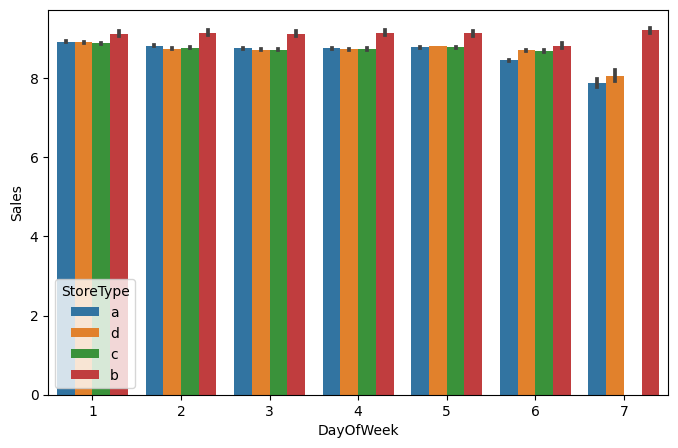

In [63]:
#let's explore store type and Day Of week
sns.barplot(x=df1['DayOfWeek'],y=df1["Sales"],hue=df1['StoreType'])

In [64]:
#let's verify in the full dataset
df1.loc[(df1['DayOfWeek']==7) & (df1['StoreType']=='b')]

DayOfWeek     Sales  Customers  Promo  StateHoliday  \
Date       Store                                                        
2013-01-09 353            7  8.818186       1434      0             0   
2013-01-12 948            7  9.185740       1878      0             0   
2013-01-20 335            7  8.794219       1196      0             0   
           682            7  8.874588       1177      0             0   
2013-01-27 494            7  8.532870        815      0             0   
...                     ...       ...        ...    ...           ...   
2015-08-02 948            7  9.276596       1990      0             0   
2015-10-05 562            7  9.870654       3265      0             0   
2015-11-01 274            7  8.765771       1270      0             0   
2015-12-07 274            7  8.934192       1567      0             0   
           769            7  9.392995       2635      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-09 353                0         b          b                900.0   
2013-01-12 948                0         b          b               1430.0   
2013-01-20 335                0         b          a                 90.0   
           682                0         b          a                150.0   
2013-01-27 494                0         b          a               1260.0   
...                         ...       ...        ...                  ...   
2015-08-02 948                0         b          b               1430.0   
2015-10-05 562                0         b          c               1210.0   
2015-11-01 274                0         b          b               3640.0   
2015-12-07 274                0         b          b               3640.0   
           769                0         b          b                840.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-09 353         1  2013      1           2          9              0.0   
2013-01-12 948         0  2013      1           2         12              0.0   
2013-01-20 335         1  2013      1           3         20              0.0   
           682         0  2013      1           3         20             76.0   
2013-01-27 494         0  2013      1           4         27             19.0   
...                  ...   ...    ...         ...        ...              ...   
2015-08-02 948         0  2015      8          31        214             23.0   
2015-10-05 562         0  2015     10          41        278             25.0   
2015-11-01 274         1  2015     11          44        305             26.0   
2015-12-07 274         1  2015     12          50        341             27.0   
           769         1  2015     12          50        341             27.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-09 353      0.000000              0  
2013-01-12 948      0.000000              0  
2013-01-20 335      0.000000              1  
           682      0.000000              0  
2013-01-27 494      0.000000              0  
...                      ...            ...  
2015-08-02 948      0.000000              0  
2015-10-05 562      0.000000              0  
2015-11-01 274     31.824658              0  
2015-12-07 274     33.205480              0  
           769     36.460274              0  

[189 rows x 17 columns]

Observation:

This suggests that store type b had high sales almost all week. No store of type C was open on Sunday.
Being open 24*7 along with all kinds of assortments available is probably the reason why it had higher average sales than any other store type.


In [65]:
df1.shape

(78544, 17)

Outlier Treatment

It can be well established that the outliers are showing this behaviour for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behaviour seems fair and important from the business point of view.
The primary reasons for the behaviour are promotion and store type B.
If the outliers are a valid occurrence it would be wise not to treat them by deleting or manipulating them especially when we have established the ups and downs of the target variable in relation to the other features. It is well established that there is seasonality involved and no linear relationship is possible to fit. For these kinds of datasets tree based machine learning algorithms are used which are robust to outlier effect.

In [66]:
df2 = df1.copy()

In [67]:
df2.head(1)

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-02,9,5,8.632306,473,0,0,0,a,c,2030.0,0,2013,1,1,2,149.0,0.0,0


In [68]:
#Sales should be the last col
columns=list(df2.columns)
columns.remove('Sales')
columns.append('Sales')
df2=df2[columns]

In [69]:
#check
df2.head(1)

,,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
Date,Store,,,,,,,,,,,,,,,,,
2013-01-02,9,5,473,0,0,0,a,c,2030.0,0,2013,1,1,2,149.0,0.0,0,8.632306


Modeling Factors affecting in choosing the model:

Determining which algorithm to use depends on many factors like the problem statement and the kind of output you want, type and size of the data, the available computational time, number of features, and observations in the data, to name a few.

The dataset used in this analysis has:

A multivariate time series relation with sales and hence a linear relationship cannot be assumed in this analysis. This kind of dataset has patterns such as peak days, festive seasons etc which would most likely be considered as outliers in simple linear regression.
Having X columns with 30% continuous and 70% categorical features. Business prefers the model to be interpretable in nature and decision based algorithms work better with categorical data.

Train-Test Split

In [70]:
df2.head(1)

,,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
Date,Store,,,,,,,,,,,,,,,,,
2013-01-02,9,5,473,0,0,0,a,c,2030.0,0,2013,1,1,2,149.0,0.0,0,8.632306


In [71]:
df2.tail(1)

,,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
Date,Store,,,,,,,,,,,,,,,,,
2015-12-07,1099,7,732,0,0,0,a,c,200.0,1,2015,12,50,341,32.0,32.284932,0,8.527737


In [72]:
df2.drop('Customers',axis=1,inplace=True)

In [73]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]

In [74]:
#csv
df_train1 = df_train.to_csv("Data/df_train2.csv")
df_test2 = df_test.to_csv("Data/df_test2.csv")

In [75]:
#X and y split for train and test 
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (71611, 15)
The shape of y_train is: (71611, 1)
The shape of X_test is: (3886, 15)
The shape of y_test is: (3886, 1)


In [76]:
#importing
from sklearn.preprocessing import OneHotEncoder
#categorical features
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']
#fit encoder
encoder = OneHotEncoder(sparse=False)
# train
encoder.fit(X_train[categorical_cols])
encoded_features = list(encoder.get_feature_names_out(categorical_cols))
X_train[encoded_features] = encoder.transform(X_train[categorical_cols])
# test
X_test[encoded_features] = encoder.transform(X_test[categorical_cols])
# drop original features
X_train.drop(categorical_cols,axis=1,inplace=True)
X_test.drop(categorical_cols,axis=1,inplace=True)

In [77]:
# scaling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])



Baseline Model: Decision Tree A baseline is a simple model that provides reasonable results on a task and does not require much expertise and time to build. Decision trees are used for handling non-linear data sets effectively.

In [78]:
#Importing libraries 
from sklearn.tree import DecisionTreeRegressor
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [79]:
#fitting decision tree
dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [119]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')
  print(f'The Mean Absolute Error for the train is {MAE_train}')
  print(f'The Mean Squared Error for the train set is {MSE_train}')
  print(f'The Root Mean Squared Error for the train set is {RMSE_train}')
  print(f'The R^2 for the train set is {R2_train}')
  print(f'The Adjusted R^2 for the train set is {Adj_r2_train}')
  

  

The Mean Absolute Error for the validation set is 0.496126
The Mean Squared Error for the validation set is 0.496523
The Root Mean Squared Error for the validation set is 0.704644
The R^2 for the validation set is 0.474169
The Adjusted R^2 for the validation set is 0.470627
The Mean Absolute Error for the train is 0.000315
The Mean Squared Error for the train set is 0.00031
The Root Mean Squared Error for the train set is 0.017617
The R^2 for the train set is 0.99969
The Adjusted R^2 for the train set is 0.99969


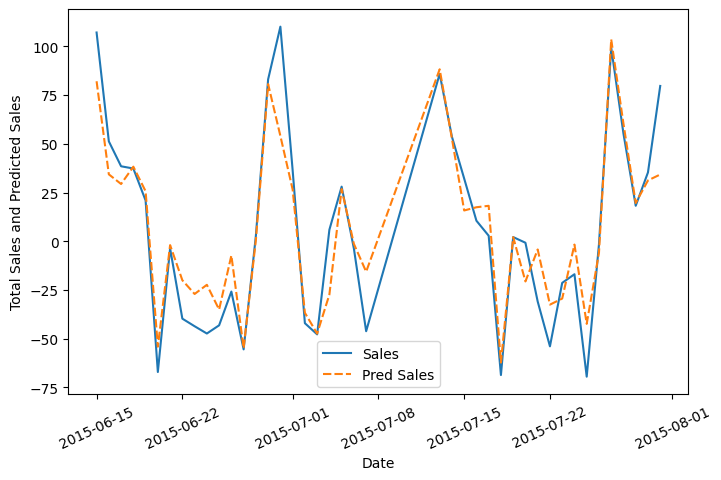

In [120]:
#decision tree evaluation
decision_tree = model_evaluation('Decision Tree Regressor',dt_basic,X_train,y_train,X_test,y_test)

In [82]:
# importing
from sklearn.ensemble import RandomForestRegressor

In [83]:
random_forest = RandomForestRegressor(n_estimators=100,random_state=42)
random_forest.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

The Mean Absolute Error for the validation set is 0.353434
The Mean Squared Error for the validation set is 0.221023
The Root Mean Squared Error for the validation set is 0.470131
The R^2 for the validation set is 0.765931
The Adjusted R^2 for the validation set is 0.764354
The Mean Absolute Error for the train is 0.122229
The Mean Squared Error for the train set is 0.029057
The Root Mean Squared Error for the train set is 0.170462
The R^2 for the train set is 0.970943
The Adjusted R^2 for the train set is 0.970932


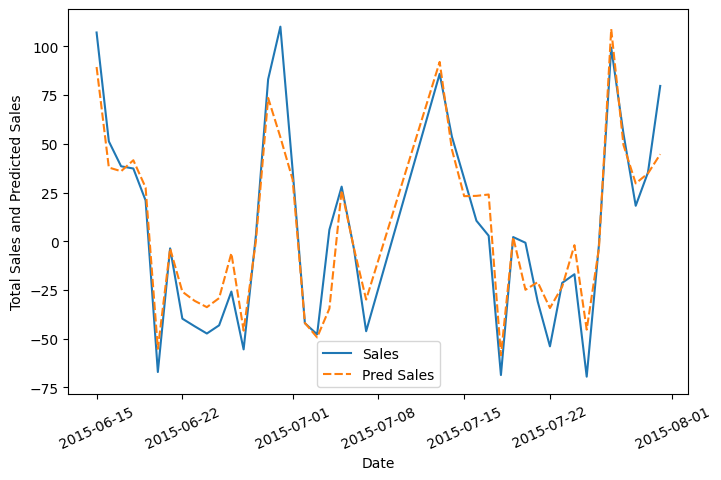

In [125]:
#model evaluation 
random_f = model_evaluation('Random Forest Regressor',random_forest,X_train,y_train,X_test,y_test)

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
Gradient_Boost = GradientBoostingRegressor(n_estimators=100,random_state=42)
Gradient_Boost.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

The Mean Absolute Error for the validation set is 0.609259
The Mean Squared Error for the validation set is 0.608585
The Root Mean Squared Error for the validation set is 0.780119
The R^2 for the validation set is 0.355492
The Adjusted R^2 for the validation set is 0.35115
The Mean Absolute Error for the train is 0.616461
The Mean Squared Error for the train set is 0.631402
The Root Mean Squared Error for the train set is 0.794608
The R^2 for the train set is 0.368598
The Adjusted R^2 for the train set is 0.368369


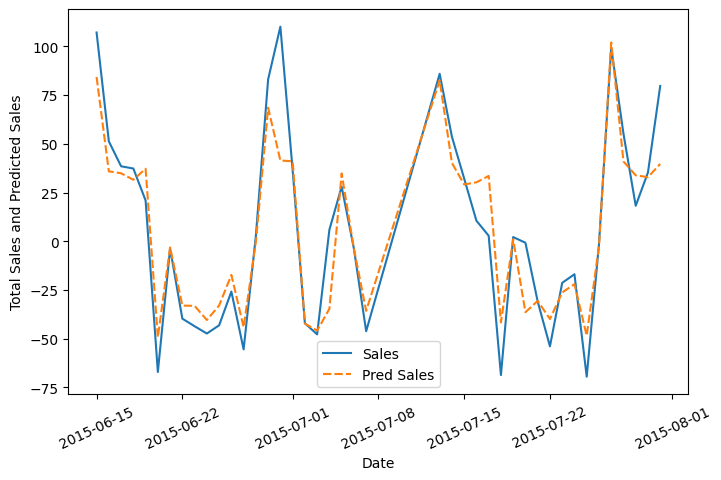

In [124]:
gradient = model_evaluation('GradientBoostingRegressor',Gradient_Boost,X_train,y_train,X_test,y_test)

In [126]:
rf_tuned = RandomForestRegressor()

In [127]:
from sklearn.model_selection import RandomizedSearchCV
#grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [ 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],
 'n_estimators': [100, 130, 150]}

rf_random = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)

#fitting
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  42.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  44.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  41.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.0min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.0min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  58.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [100, 130, 150]},
                   random_state=42, verbose=2)

In [128]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [130]:
random_t = rf_random.best_estimator_

The Mean Absolute Error for the validation set is 0.356225
The Mean Squared Error for the validation set is 0.224956
The Root Mean Squared Error for the validation set is 0.474296
The R^2 for the validation set is 0.761765
The Adjusted R^2 for the validation set is 0.76016
The Mean Absolute Error for the train is 0.169476
The Mean Squared Error for the train set is 0.058654
The Root Mean Squared Error for the train set is 0.242186
The R^2 for the train set is 0.941346
The Adjusted R^2 for the train set is 0.941325


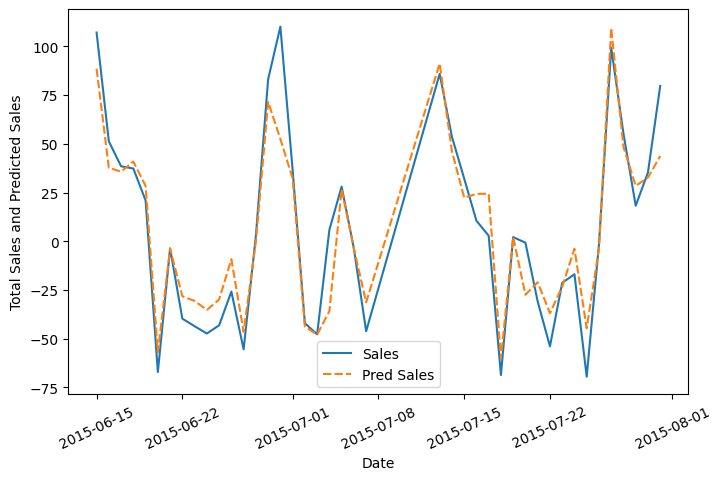

In [131]:
random_tuned = model_evaluation('Random Forest Tuned',random_t,X_train,y_train,X_test,y_test)

In [107]:
y_pred_test = random_t.predict(X_test)


In [108]:
y_pred_test

array([ 0.60819279,  0.51567696,  0.69410941, ...,  0.33454304,
        1.15087756, -0.24495214])

In [109]:
y_pred_test = random_t.predict(X_test)
sales_df = y_test.copy()
sales_df['Pred_Sales'] = y_pred_test.tolist()

In [110]:
#head
sales_df.head()

Sales  Pred_Sales
Date       Store                      
2015-06-15 6      0.272573    0.608193
           21     0.878495    0.515677
           39     0.511061    0.694109
           42     2.005867    1.706836
           43     1.355678    0.841223

In [111]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#fitting to the original data
cleaned_unscaled_data= pd.read_csv("Data/clean2.csv")
#fitting numerical columns
numerical_cols = ['Sales']
scaler = MinMaxScaler()
scaler.fit(cleaned_unscaled_data[numerical_cols])

MinMaxScaler()

In [112]:
#inverse
sales_df[['Sales']] = scaler.inverse_transform(sales_df[['Sales']])
sales_df[['Pred_Sales']] = scaler.inverse_transform(sales_df[['Pred_Sales']])

In [113]:
#sales vs predictions
sales_df.head()

Sales    Pred_Sales
Date       Store                            
2015-06-15 6      10118.468206  22577.332771
           21     32611.496755  19142.960274
           39     18971.603593  25766.729451
           42     74461.777902  63361.173073
           43     50325.475199  31227.881038

Total sales prediction 

In [114]:
submission = pd.DataFrame(sales_df)
submission.to_csv("Submission1.csv")